<div style="text-align: center;">
  <span style="font-size: 24px; font-weight: bold;">SMD Dataset Analysis and Preprocessing</span>
</div>

<span style="font-size:22px;font-weight:bold"> 1.Introduction </span>

<span style="font-size:18px;font-weight:bold"> 1.1 Analysis Overview </span>


<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The purpose of this report is to provide an in-depth analysis of the Server Machine Dataset (SMD), its composition, and its characteristics.
</span>


<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We will thoroughly present the internal structure of the SMD dataset, highlight its key features, and explain its value in the field of server anomaly detection.
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;More importantly, this report will carefully document and explain each data preprocessing step we executed to effectively utilize the SMD dataset. From loading the raw data to the final data standardization, each step will be described in detail to ensure that the reader can fully understand the entire data preprocessing process.z
</span

<span style="font-size:18px;font-weight:bold"> 1.2 Dataset </span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The SMD dataset is specifically designed for server health monitoring and anomaly detection.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It contains various monitoring metrics from real server machines, such as CPU utilization, memory usage, disk I/O, etc.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By analyzing these monitoring metrics, we can detect abnormal behavior in servers promptly, thereby ensuring the stable operation of the servers.<br>
</span>

<span style="font-size:18px;font-weight:bold"> 1.3 Process Overview </span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Data preprocessing is a critical step in using the SMD dataset for anomaly detection.<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The entire preprocessing process can be summarized into the following key stages:<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>Data Loading:</strong> Load the raw SMD data from text files into a Pandas DataFrame for subsequent processing.<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>Data Cleaning:</strong> Handle issues like missing values, duplicates, and other data quality problems to ensure data accuracy and completeness.<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>Feature Engineering:</strong> Extract useful features from the raw data, such as differential features and sliding window statistical features, to enhance the model's expressive power.<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>Data Normalization:</strong> Transform the data into a distribution with a mean of 0 and a standard deviation of 1 to eliminate the impact of different scales and improve model training efficiency.<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>Sliding Window Splitting:</strong> Convert time-series data into supervised learning data to facilitate modeling using machine learning algorithms.<br>
</span>


<span style="font-size:18px;font-weight:bold"> 1.4 Use of python libraries </span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  <strong>pandas:</strong> <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This library provides DataFrames and Series for efficient data manipulation, including reading, writing, and transforming tabular data.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Usage in Code: Enables loading raw SMD text files into structured DataFrames and saving processed data as CSV files, ensuring data is organized for analysis. It facilitates data cleaning by filling missing values and removing duplicates, maintaining data integrity. Additionally, it supports feature engineering by creating new columns for differential and rolling statistical features, enhancing the dataset’s informativeness for anomaly detection.<br><br>
    <strong>numpy:</strong> <br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This library supports numerical computations with arrays, enabling efficient mathematical operations.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Usage in Code: Handles numerical data loading from text files into arrays, allowing fast processing of large datasets. It performs calculations for differential features (e.g., differences between consecutive values) and frequency-domain features (e.g., FFT-based dominant frequency), enriching the dataset with temporal patterns. It also constructs sliding window arrays for time-series data, preparing it for machine learning model input.<br><br>
    <strong>sklearn.preprocessing:</strong> <br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This module from scikit-learn provides tools for data preprocessing, including feature scaling and normalization.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Usage in Code: Applies StandardScaler to normalize numerical features to a mean of zero and unit variance, ensuring features are on a comparable scale for machine learning models. This normalization improves model training stability and performance. The scaler is reused across training and testing datasets to maintain consistent preprocessing, critical for accurate anomaly detection.<br><br>
    <strong>scipy.stats.mstats:</strong> <br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This module from SciPy provides statistical functions, including robust methods for handling outliers.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Usage in Code: Uses the winsorize function to cap extreme values at specified percentiles, reducing the impact of outliers without removing data points. This ensures robust data preprocessing, preventing skewed results in anomaly detection models by stabilizing feature distributions.<br><br>
    <strong>os:</strong> <br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This standard Python library enables interaction with the operating system, such as file and directory management.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Usage in Code: Manages file system operations by navigating directories, creating output folders, and iterating through SMD dataset files. This enables automated processing of multiple text files into CSV format, streamlining the data preparation workflow for large datasets.<br><br>
     <strong>joblib:</strong> <br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This library provides tools for efficient serialization and parallel computing, often used for saving and loading machine learning models or preprocessors.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Usage in Code: Although imported, it is not directly used in the provided code. It is typically employed to save and load the StandardScaler object, ensuring consistent feature scaling between training and testing phases, which supports reproducible preprocessing workflows.<br><br>
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">**Code Snippet:**
</span>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize 
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from pandas.errors import PerformanceWarning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=PerformanceWarning)

<span style="font-size:18px;font-weight:bold"> 1.5 Code Files </span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;During the data preprocessing process, we utilized the following primary Python code files:<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>data_preprocessing.py:</strong> This file contains functions related to loading and converting the raw SMD data, such as the load_and_save_smd function.<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>data_cleaning.py:</strong> This file contains functions related to data cleaning and feature engineering, such as add_features and winsorize_dataframe functions.<br>
</span>

<span style="font-size:22px;font-weight:bold"> 2.Original Dataset Analysis </span>

<span style="font-size:18px;font-weight:bold"> 2.1 Original Dataset Introduction </span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This project utilizes the Server Machine Dataset (SMD), a publicly available dataset sourced from NetManAIOps's GitHub repository. The dataset is associated with the research paper "Robust Anomaly Detection for Multivariate Time Series through Stochastic RNN". The SMD dataset is valuable for evaluating anomaly detection algorithms in complex, real-world scenarios.
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The dataset comprises five weeks of server machine data, with a time granularity of one minute. The dataset does not explicitly include a timestamp index. The data is divided into 28 distinct machines, each represented as a separate entity. Each entity is characterized by 38 dimensions, where each dimension corresponds to a specific metric collected from the machine.
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The total dataset size is 57,246,028 data points, which equates to 1,411,200 data points per machine. The dataset is split into training and testing sets with a 1:1 ratio. The training set is unlabeled, consisting of normal operating data. The testing set is labeled, indicating whether each data point represents an anomaly.
</span>

 <span style="font-size:18px;font-weight:bold"> 2.2 Original Dataset choose </span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
    <strong>Data Independence Requires Individual Modeling:</strong> <br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Since the official documentation states that data from different machines is uncorrelated and independent, combining data from multiple machines could introduce noise or inconsistent patterns, making it difficult for the model to effectively learn the behavior of a specific machine.
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By focusing on the data from the first machine, we ensure that the model learns the specific time-series patterns and anomaly characteristics unique to that machine, avoiding interference from the distributional differences across machines.
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
    <strong>Task Simplification and Resource Efficiency:</strong> <br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The SMD dataset includes multiple machines (28 machines, depending on the dataset version), each potentially containing a large volume of data. Building separate models for each machine significantly increases computational cost and complexity. Selecting the first machine’s data as a representative dataset simplifies the task, reduces resource demands, and still allows for validating the model’s effectiveness.
</span>

<span style="font-size:18px;font-weight:bold"> 2.3 Original Dataset Structure </span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">**Original Files:**
</span>
<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;train: Contains the first half of the dataset, representing normal operating conditions. Filenames follow the format machine-x-y.txt, where x denotes the group and y is the index within the group, uniquely identifying each machine/entity.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;test: Contains the second half of the dataset, including both normal and anomalous data points.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;test_label: Provides the anomaly labels for the testing set. A value of 1 indicates an anomaly, while 0 indicates normal operation.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;interpretation_label: This file offers insights into the specific dimensions that contribute to each detected anomaly, providing valuable information for understanding the root causes of the anomalies.<br>
</span>

<span style="font-size:18px;font-weight:bold"> 2.4 Part of the Original File </span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">**Train File:**
</span>

In [2]:
    dataset = 'SMD'
    dataset_folder = './ServerMachineDataset'
    output_folder = './Processed_data'
    save_dir= '../saved_models'
    model_path = os.path.join(save_dir, 'conv_bi_gru_autoencoder.pth')
    scaler_path = os.path.join(save_dir, 'scaler_new.pkl')

    # 要输出的目录列表
    directories = ["train"]
    #directories = ["train", "test", "test_label", "interpretation_label"]
    for directory in directories:
        print(f"------  {directory} Directory Example  ------")
        dir_path = os.path.join(dataset_folder, directory)

        # 检查目录是否存在
        if not os.path.exists(dir_path):
            print(f"The directory {dir_path} does not exist!")
            print("\n")
            continue

        try:
            # 尝试获取第一个 .txt 文件
            first_txt_file = next((f for f in os.listdir(dir_path) if f.endswith(".txt")), None)

            if first_txt_file:
                txt_file_path = os.path.join(dir_path, first_txt_file)
                print(f"  -Read the.txt file: {first_txt_file}")
                with open(txt_file_path, 'r') as f:
                    for i in range(5):
                        print(f"    {f.readline().strip()}")
            else:
                print("  - There is no.txt file in the directory")


        except Exception as e:
            print(f"  - Error {e}")

        print("\n")

------  train Directory Example  ------
  -Read the.txt file: machine-1-1.txt
    0.032258,0.039195,0.027871,0.024390,0.000000,0.915385,0.343691,0.000000,0.020011,0.000122,0.106312,0.081081,0.027397,0.060266,0.085018,0.122516,0.000000,0.000000,0.062195,0.041221,0.043242,0.031607,0.533195,0.010224,0.011195,0.009274,0.000000,0.036625,0.000000,0.004298,0.029993,0.022131,0.000000,0.000045,0.034677,0.034747,0.000000,0.000000
    0.043011,0.048729,0.033445,0.025552,0.000000,0.915385,0.344633,0.000000,0.019160,0.001722,0.136174,0.081081,0.027397,0.054029,0.084621,0.151205,0.000000,0.000000,0.051131,0.036651,0.042554,0.031229,0.576976,0.007564,0.011719,0.006761,0.000000,0.036546,0.000000,0.004298,0.030041,0.028821,0.000000,0.000045,0.035763,0.035833,0.000000,0.000000
    0.043011,0.034958,0.032330,0.025552,0.000000,0.915385,0.344633,0.000000,0.020011,0.000122,0.200370,0.067568,0.027397,0.057157,0.087198,0.215548,0.000000,0.000000,0.047139,0.035940,0.037331,0.027430,0.512524,0.008205,0.008921,0

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">**Test File:**
</span>

In [3]:
    dataset = 'SMD'
    dataset_folder = './ServerMachineDataset'
    output_folder = './Processed_data'

    # 要输出的目录列表
    directories = ["test"]
    #directories = ["train", "test", "test_label", "interpretation_label"]
    for directory in directories:
        print(f"------  {directory} Directory Example  ------")
        dir_path = os.path.join(dataset_folder, directory)

        # 检查目录是否存在
        if not os.path.exists(dir_path):
            print(f"The directory {dir_path} does not exist!")
            print("\n")
            continue

        try:
            # 尝试获取第一个 .txt 文件
            first_txt_file = next((f for f in os.listdir(dir_path) if f.endswith(".txt")), None)

            if first_txt_file:
                txt_file_path = os.path.join(dir_path, first_txt_file)
                print(f"  -Read the.txt file: {first_txt_file}")
                with open(txt_file_path, 'r') as f:
                    for i in range(5):
                        print(f"    {f.readline().strip()}")
            else:
                print("  - There is no.txt file in the directory")


        except Exception as e:
            print(f"  - Error {e}")

        print("\n")

------  test Directory Example  ------
  -Read the.txt file: machine-1-1.txt
    0.075269,0.065678,0.070234,0.074332,0.000000,0.933333,0.274011,0.000000,0.031081,0.000000,0.134132,0.081081,0.027397,0.067808,0.125842,0.150562,0.000000,0.000000,0.121988,0.091978,0.093960,0.074155,0.935405,0.018077,0.032010,0.016584,0.000000,0.077702,0.000000,0.008596,0.068036,0.048893,0.000386,0.000034,0.064432,0.064500,0.000000,0.000000
    0.086022,0.080508,0.075808,0.076655,0.000000,0.930769,0.274953,0.000000,0.031081,0.000122,0.148813,0.162162,0.054795,0.071395,0.123068,0.164490,0.000000,0.000000,0.121396,0.094162,0.096160,0.076482,0.996555,0.016026,0.033584,0.014735,0.000000,0.079396,0.000000,0.008596,0.070020,0.050437,0.000386,0.000022,0.065228,0.065224,0.000000,0.000000
    0.075269,0.064619,0.071349,0.074332,0.000000,0.928205,0.274953,0.000000,0.030940,0.000366,0.134826,0.094595,0.027397,0.063277,0.129013,0.151546,0.000000,0.000000,0.115384,0.090118,0.095940,0.075746,0.960310,0.011763,0.033584,0.

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">**Interpretation_label File:**
</span>

In [4]:
    dataset = 'SMD'
    dataset_folder = './ServerMachineDataset'
    output_folder = './Processed_data'

    # 要输出的目录列表
    directories = ["interpretation_label"]
    #directories = ["train", "test", "test_label", "interpretation_label"]
    for directory in directories:
        print(f"------  {directory} Directory Example  ------")
        dir_path = os.path.join(dataset_folder, directory)

        # 检查目录是否存在
        if not os.path.exists(dir_path):
            print(f"The directory {dir_path} does not exist!")
            print("\n")
            continue

        try:
            # 尝试获取第一个 .txt 文件
            first_txt_file = next((f for f in os.listdir(dir_path) if f.endswith(".txt")), None)

            if first_txt_file:
                txt_file_path = os.path.join(dir_path, first_txt_file)
                print(f"  -Read the.txt file: {first_txt_file}")
                with open(txt_file_path, 'r') as f:
                    for i in range(5):
                        print(f"    {f.readline().strip()}")
            else:
                print("  - There is no.txt file in the directory")


        except Exception as e:
            print(f"  - Error {e}")

        print("\n")

------  interpretation_label Directory Example  ------
  -Read the.txt file: machine-1-1.txt
    15849-16368:1,9,10,12,13,14,15
    16963-17517:1,2,3,4,6,7,9,10,11,12,13,14,15,16,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36
    18071-18528:1,2,9,10,12,13,14,15
    19367-20088:1,2,3,4,9,10,11,12,13,14,15,16,25,28
    20786-21195:1,9,10,12,13,14,15




<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">**Test_label File:**
</span>

In [5]:
    dataset = 'SMD'
    dataset_folder = './ServerMachineDataset'
    output_folder = './Processed_data'

    # 要输出的目录列表
    directories = ["test_label"]
    #directories = ["train", "test", "test_label", "interpretation_label"]
    for directory in directories:
        print(f"------  {directory} Directory Example  ------")
        dir_path = os.path.join(dataset_folder, directory)

        # 检查目录是否存在
        if not os.path.exists(dir_path):
            print(f"The directory {dir_path} does not exist!")
            print("\n")
            continue

        try:
            # 尝试获取第一个 .txt 文件
            first_txt_file = next((f for f in os.listdir(dir_path) if f.endswith(".txt")), None)

            if first_txt_file:
                txt_file_path = os.path.join(dir_path, first_txt_file)
                print(f"  -Read the.txt file: {first_txt_file}")
                with open(txt_file_path, 'r') as f:
                    for i in range(5):
                        print(f"    {f.readline().strip()}")
            else:
                print("  - There is no.txt file in the directory")


        except Exception as e:
            print(f"  - Error {e}")

        print("\n")

------  test_label Directory Example  ------
  -Read the.txt file: machine-1-1.txt
    0
    0
    0
    0
    0




<span style="font-size:22px;font-weight:bold"> 3. Data Preprocessing </span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This code provides a pipeline to transform the Server Machine Dataset (SMD) from its original .txt format into a structured CSV format suitable for machine learning, then loads and preprocesses the data for time-series analysis. The prepare_smd_data function initiates the process by converting the raw .txt files into CSVs using load_and_save_smd, which also merges labels for test data. Finally, the load_data function uses the processed CSV files to create training and testing datasets, applying feature engineering and scaling to prepare the data for use in machine learning models designed for time-series anomaly detection.
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">**Code Snippet(data_preprocessing.py):**
</span>

In [6]:
def load_data(train_file, test_file, seq_length, scaler=None, winsorize_clip=True):
    X_train, _, _ = prepare_data_with_features(
        train_file, seq_length, scaler=scaler, return_labels=False, winsorize_clip=winsorize_clip
    )

    X_all, _, y_all = prepare_data_with_features(
        test_file, seq_length, scaler=scaler, return_labels=True, winsorize_clip=winsorize_clip
    )
    return X_train, X_all, y_all, scaler

def load_and_save_smd(category, filename, dataset, dataset_folder, output_folder):
    """加载 SMD 数据集并保存为 CSV 格式"""
    os.makedirs(os.path.join(output_folder, filename.split('.')[0]), exist_ok=True)
    temp = np.genfromtxt(os.path.join(dataset_folder, category, filename),
                         dtype=np.float32,
                         delimiter=',')
    # print(dataset, category, filename, temp.shape)
    fea_len = len(temp[0, :])
    header_list = []
    for i in range(fea_len):
        header_list.append("col_%d"%i)
    data = pd.DataFrame(temp, columns=header_list).reset_index()
    data.rename(columns={'index': 'timestamp'}, inplace=True)
    if category == "test":
        temp1 = np.genfromtxt(os.path.join(dataset_folder, "test_label", filename),
                         dtype=np.float32,
                         delimiter=',')
        data1 = pd.DataFrame(temp1, columns=["label"]).reset_index()
        data1.rename(columns={'index': 'timestamp'}, inplace=True)
        data = pd.merge(data, data1, how="left", on='timestamp')

    print(dataset, category, filename, temp.shape)
    data.to_csv(os.path.join(output_folder,  filename.split('.')[0], dataset + "_" + category + ".csv"), index=False)

def prepare_smd_data(dataset, dataset_folder, output_folder):
    """准备 SMD 数据集，将其转换为 CSV 格式"""
    if dataset == 'SMD':
        file_list = os.listdir(os.path.join(dataset_folder, "train"))
        for filename in file_list:
            if filename.endswith('.txt'):
                load_and_save_smd('train', filename, filename.strip('.txt'), dataset_folder, output_folder)
                load_and_save_smd('test', filename, filename.strip('.txt'), dataset_folder, output_folder)


<span style="font-size:18px;font-weight:bold"> 3.1 Processed Data Analysis  </span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After running the above code, we can obtain the processed data.
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We can print a sample of the processed data from the train, test, and interpretation label files respectively, as shown below.
</span>

In [7]:
train_file = 'Processed_data/machine-1-1/machine-1-1_train.csv'
test_file = 'Processed_data/machine-1-1/machine-1-1_test.csv'
anomaly_log_file = 'ServerMachineDataset/interpretation_label/machine-1-1.txt'

In [8]:
try:
    df_train = pd.read_csv(train_file)
    print("The first five lines of the original test data:\n", df_train.head())
except FileNotFoundError:
    print(f"Error: The test data file cannot be found. {train_file}")

The first five lines of the original test data:
    timestamp     col_0     col_1     col_2     col_3  col_4     col_5  \
0          0  0.032258  0.039195  0.027871  0.024390    0.0  0.915385   
1          1  0.043011  0.048729  0.033445  0.025552    0.0  0.915385   
2          2  0.043011  0.034958  0.032330  0.025552    0.0  0.915385   
3          3  0.032258  0.028602  0.030100  0.024390    0.0  0.912821   
4          4  0.032258  0.019068  0.026756  0.023229    0.0  0.912821   

      col_6  col_7     col_8  ...  col_28    col_29    col_30    col_31  \
0  0.343691    0.0  0.020011  ...     0.0  0.004298  0.029993  0.022131   
1  0.344633    0.0  0.019160  ...     0.0  0.004298  0.030041  0.028821   
2  0.344633    0.0  0.020011  ...     0.0  0.004298  0.026248  0.021101   
3  0.342750    0.0  0.021289  ...     0.0  0.004298  0.030169  0.025733   
4  0.342750    0.0  0.018734  ...     0.0  0.004298  0.027240  0.022645   

   col_32    col_33    col_34    col_35  col_36  col_37  
0  

In [9]:
try:
    df_test= pd.read_csv(test_file)
    print("The first five lines of the original test data:\n", df_test.head())
except FileNotFoundError:
    print(f"Error: The test data file cannot be found: {test_file}")

The first five lines of the original test data:
    timestamp     col_0     col_1     col_2     col_3  col_4     col_5  \
0          0  0.075269  0.065678  0.070234  0.074332    0.0  0.933333   
1          1  0.086022  0.080508  0.075808  0.076655    0.0  0.930769   
2          2  0.075269  0.064619  0.071349  0.074332    0.0  0.928205   
3          3  0.086022  0.048729  0.063545  0.070848    0.0  0.928205   
4          4  0.086022  0.051907  0.062430  0.070848    0.0  0.933333   

      col_6  col_7     col_8  ...    col_29    col_30    col_31    col_32  \
0  0.274011    0.0  0.031081  ...  0.008596  0.068036  0.048893  0.000386   
1  0.274953    0.0  0.031081  ...  0.008596  0.070020  0.050437  0.000386   
2  0.274953    0.0  0.030940  ...  0.008596  0.069684  0.055069  0.000386   
3  0.273070    0.0  0.027250  ...  0.010029  0.073253  0.051467  0.000000   
4  0.274011    0.0  0.030940  ...  0.008596  0.070932  0.051467  0.000386   

     col_33    col_34    col_35  col_36  col_37  

In [10]:
try:
    with open(anomaly_log_file, 'r') as f:
        lines = f.readlines()  

    num_lines = min(5, len(lines))
    print("Before the original test data：", num_lines, "lines:\n")
    for i in range(num_lines):
        print(lines[i].strip()) # Print each line and remove line breaks

except FileNotFoundError:
    print(f"Error: The test data file cannot be found: {anomaly_log_file}")

Before the original test data： 5 lines:

15849-16368:1,9,10,12,13,14,15
16963-17517:1,2,3,4,6,7,9,10,11,12,13,14,15,16,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36
18071-18528:1,2,9,10,12,13,14,15
19367-20088:1,2,3,4,9,10,11,12,13,14,15,16,25,28
20786-21195:1,9,10,12,13,14,15


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28479 entries, 0 to 28478
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  28479 non-null  int64  
 1   col_0      28479 non-null  float64
 2   col_1      28479 non-null  float64
 3   col_2      28479 non-null  float64
 4   col_3      28479 non-null  float64
 5   col_4      28479 non-null  float64
 6   col_5      28479 non-null  float64
 7   col_6      28479 non-null  float64
 8   col_7      28479 non-null  float64
 9   col_8      28479 non-null  float64
 10  col_9      28479 non-null  float64
 11  col_10     28479 non-null  float64
 12  col_11     28479 non-null  float64
 13  col_12     28479 non-null  float64
 14  col_13     28479 non-null  float64
 15  col_14     28479 non-null  float64
 16  col_15     28479 non-null  float64
 17  col_16     28479 non-null  float64
 18  col_17     28479 non-null  float64
 19  col_18     28479 non-null  float64
 20  col_19

In [12]:
print(f"Shape of X: {df_train.shape}")

Shape of X: (28479, 39)


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28479 entries, 0 to 28478
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  28479 non-null  int64  
 1   col_0      28479 non-null  float64
 2   col_1      28479 non-null  float64
 3   col_2      28479 non-null  float64
 4   col_3      28479 non-null  float64
 5   col_4      28479 non-null  float64
 6   col_5      28479 non-null  float64
 7   col_6      28479 non-null  float64
 8   col_7      28479 non-null  float64
 9   col_8      28479 non-null  float64
 10  col_9      28479 non-null  float64
 11  col_10     28479 non-null  float64
 12  col_11     28479 non-null  float64
 13  col_12     28479 non-null  float64
 14  col_13     28479 non-null  float64
 15  col_14     28479 non-null  float64
 16  col_15     28479 non-null  float64
 17  col_16     28479 non-null  float64
 18  col_17     28479 non-null  float64
 19  col_18     28479 non-null  float64
 20  col_19

 <span style="font-size:18px;font-weight:bold"> 3.2 Processed Data Visualization </span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>3.2.1 Time Series of Monitoring Metrics </strong><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This code snippet generates a time series plot visualizing the behavior of three monitoring metrics (col_0, col_1, and col_2) over time, using the 'timestamp' column from the df_train DataFrame as the x-axis.  We display each metric as a separate line with a distinct color, labeled in the legend, allowing for a visual comparison of their trends and patterns within the observed time period.
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">**Code Snippet:**
</span>

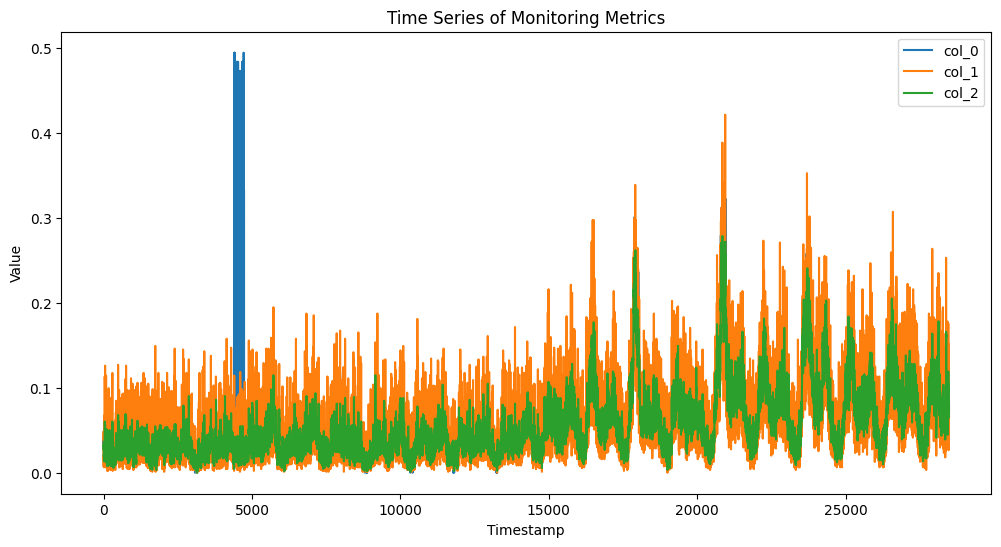

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df_train['timestamp'], df_train['col_0'], label='col_0')
plt.plot(df_train['timestamp'], df_train['col_1'], label='col_1')
plt.plot(df_train['timestamp'], df_train['col_2'], label='col_2')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series of Monitoring Metrics')
plt.legend()
plt.show()

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>3.2.2 Distribution of Monitoring Metrics</strong><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This code creates a set of overlaid histograms using Seaborn's histplot function to visualize the distributions of three monitoring metrics (col_0, col_1, and col_2) from the df_train DataFrame.  Each metric's distribution is displayed with an accompanying Kernel Density Estimate (KDE) curve to provide a smoothed representation of the distribution's shape.  
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">**Code Snippet:**
</span>

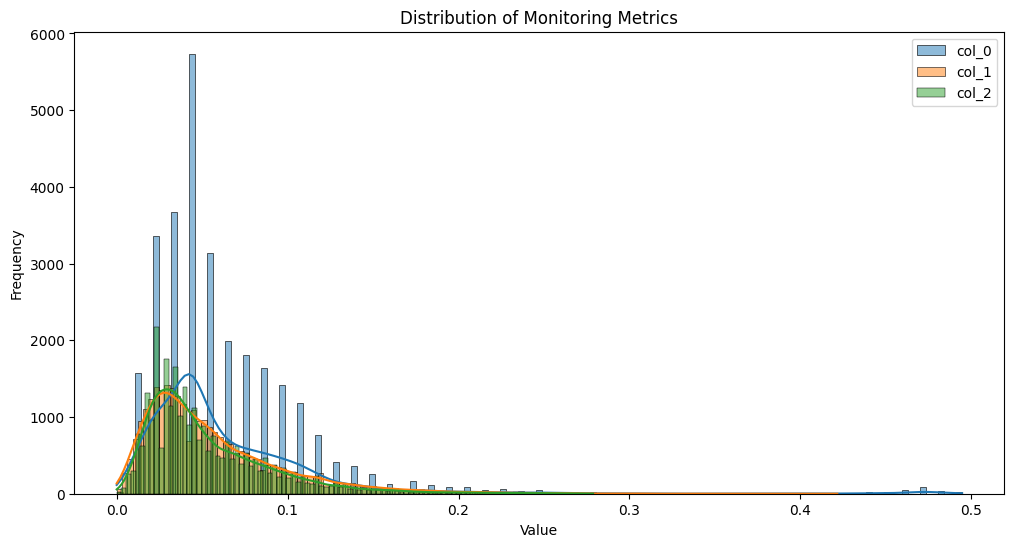

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(df_train['col_0'], kde=True, label='col_0')
sns.histplot(df_train['col_1'], kde=True, label='col_1')
sns.histplot(df_train['col_2'], kde=True, label='col_2')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Monitoring Metrics')
plt.legend()
plt.show()

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<strong>3.2.3 Boxplot of Monitoring Metrics</strong><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This code generates a boxplot visualization using Plotly Express.  It takes data from the 'df_train' DataFrame and creates box plots for the 'col_0', 'col_1', and 'col_2' columns. The purpose of this visualization is to compare the distributions of these three monitoring metrics, identify their median values, quartiles, potential outliers, and overall ranges, giving a quick overview of their statistical characteristics.
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">**Code Snippet:**
</span>

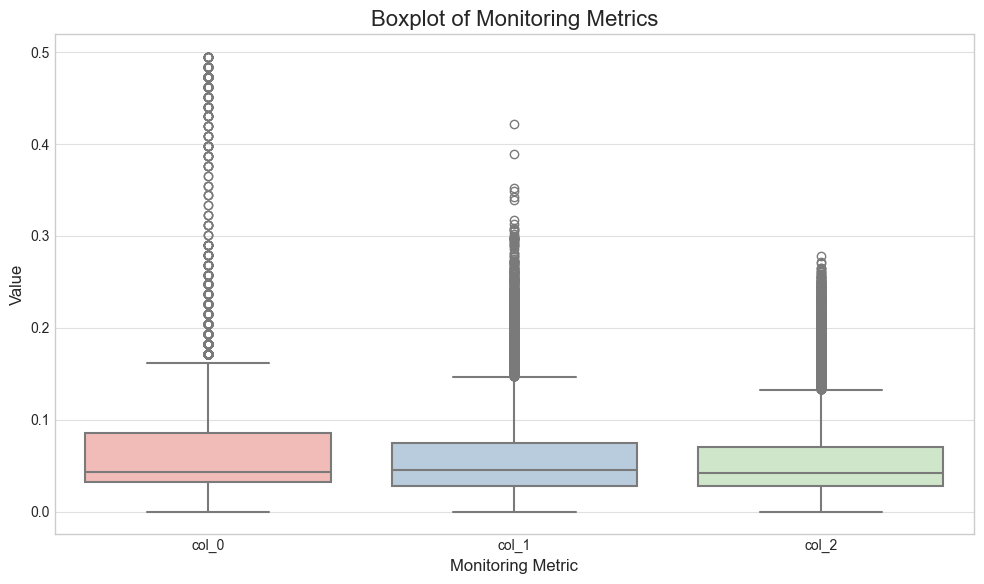

In [16]:
data = df_train[['col_0', 'col_1', 'col_2']]

# 设置绘图风格
plt.style.use('seaborn-v0_8-whitegrid')

# 创建图形和轴
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
sns.boxplot(data=data, linewidth=1.5, palette="Pastel1", ax=ax)

# 设置标题和标签
ax.set_title('Boxplot of Monitoring Metrics', fontsize=16, loc='center')
ax.set_ylabel('Value', fontsize=12)
ax.set_xlabel('Monitoring Metric', fontsize=12)

# 设置字体
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

# 设置y轴网格线
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.7)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>3.2.4 Histogram Comparision </strong><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This code generates a series of histograms to compare the distributions of features between the training and testing datasets.   It iterates through the first few columns (excluding 'timestamp') of the 'df_train' and 'df_test' DataFrames, creating a histogram for each feature.   The histograms display both the training data (in blue) and the testing data (in red), with Kernel Density Estimates (KDE) overlaid to show the shape of the distributions.   The purpose of this visualization is to assess whether the distributions of individual features are similar between the training and testing sets.   This is important for identifying potential dataset shift issues, where the characteristics of the training data differ significantly from the testing data, which can impact model performance.
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">**Code Snippet:**
</span>

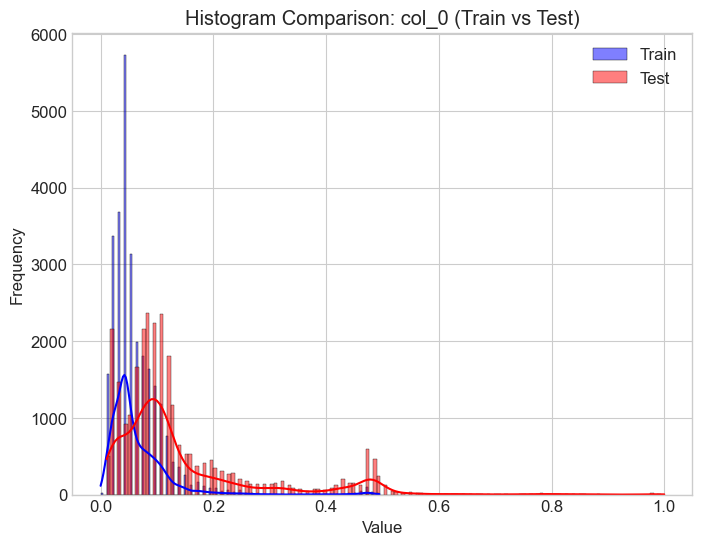

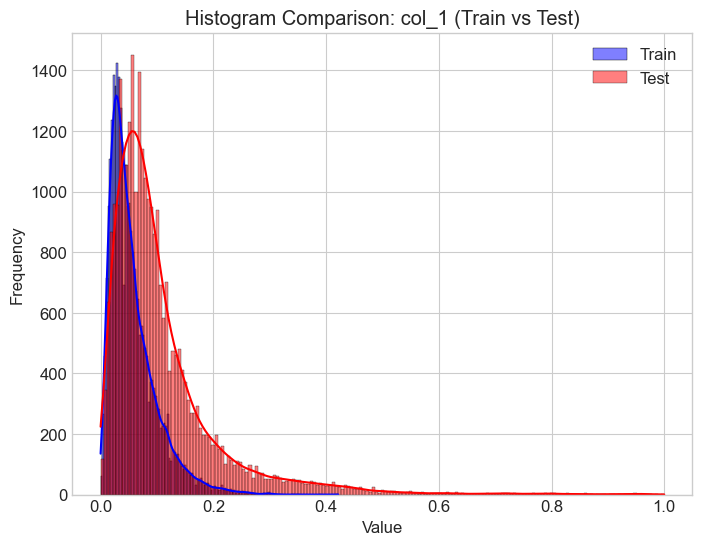

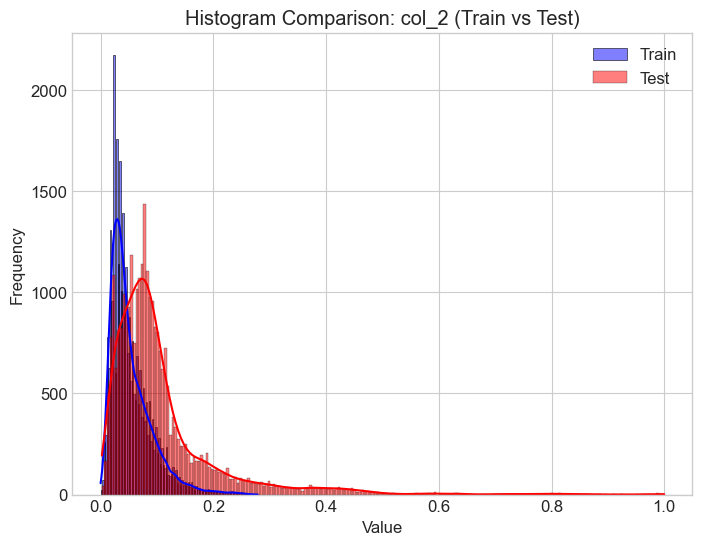

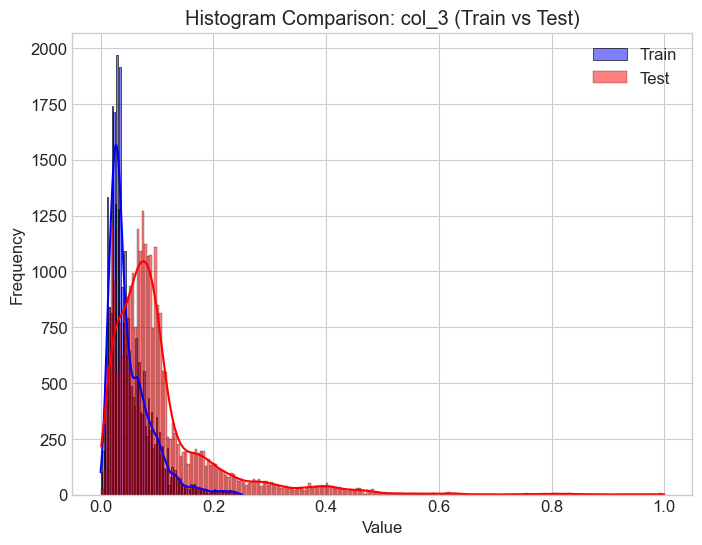

In [17]:
num_cols = min(5, len(df_train.columns))  
feature_cols = df_train.columns[:num_cols]
feature_cols = [col for col in feature_cols if col != 'timestamp']
for col in feature_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_train[col], label='Train', kde=True, color='blue')
    sns.histplot(df_test[col], label='Test', kde=True, color='red')
    plt.title(f'Histogram Comparison: {col} (Train vs Test)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>3.2.5 Heatmap of Top 15 Feature Correlation </strong><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This code calculates and visualizes the correlation matrix of the top n (in this case, 15) most correlated features in the training dataset.  First, it computes the correlation matrix of the 'df_train' DataFrame.  Then, it calculates a 'feature correlation' score for each column by summing the absolute values of its correlations with all other columns, identifies the top n features based on these scores, and extracts the correlation matrix for only those top features.  The purpose of this heatmap is to identify the strongest positive and negative correlations between the most important features within the training data.  This helps understand feature relationships, potential multicollinearity issues, and guide feature selection for model building.
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">**Code Snippet:**
</span>

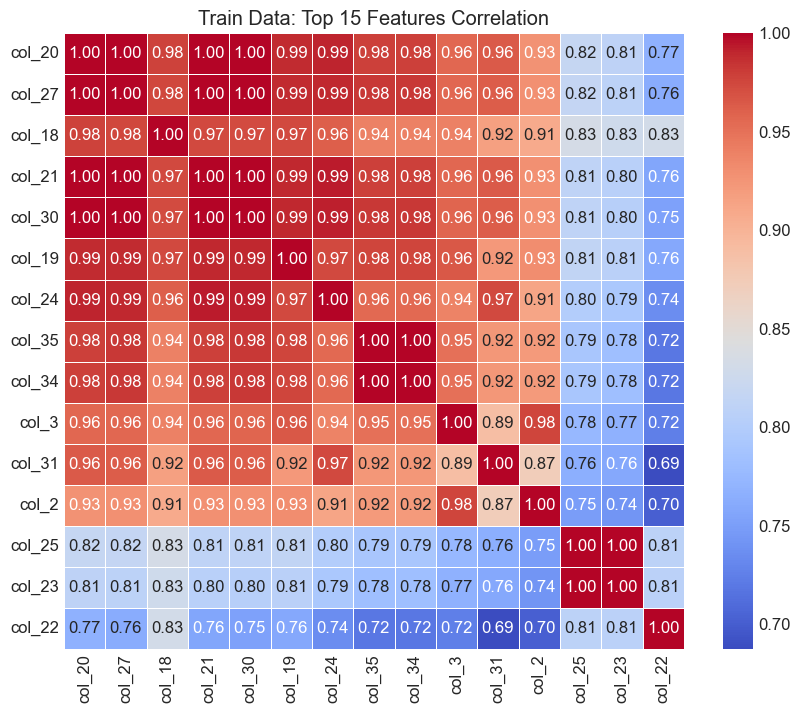

In [18]:
 # --- Train Data ---
n = 15 
corr_matrix_train = df_train.corr()
feature_correlations_train = corr_matrix_train.abs().sum()
top_n_features_train = feature_correlations_train.nlargest(n).index
top_corr_matrix_train = corr_matrix_train.loc[top_n_features_train, top_n_features_train]

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix_train, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title(f"Train Data: Top {n} Features Correlation")
plt.show()

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>3.2.6 Pie chart of Labels in Test Data </strong><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This code calculates the frequency of each unique label value and stores them in a Pandas DataFrame.    Then, we creates a pie chart using Plotly Express, where each slice represents a different label, and the size of the slice corresponds to the proportion of that label in the test set. The purpose of this pie chart is to provide a clear overview of the class distribution in the test data, which is crucial for understanding potential biases or imbalances in the dataset that might impact model evaluation and performance. 
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">**Code Snippet:**
</span>

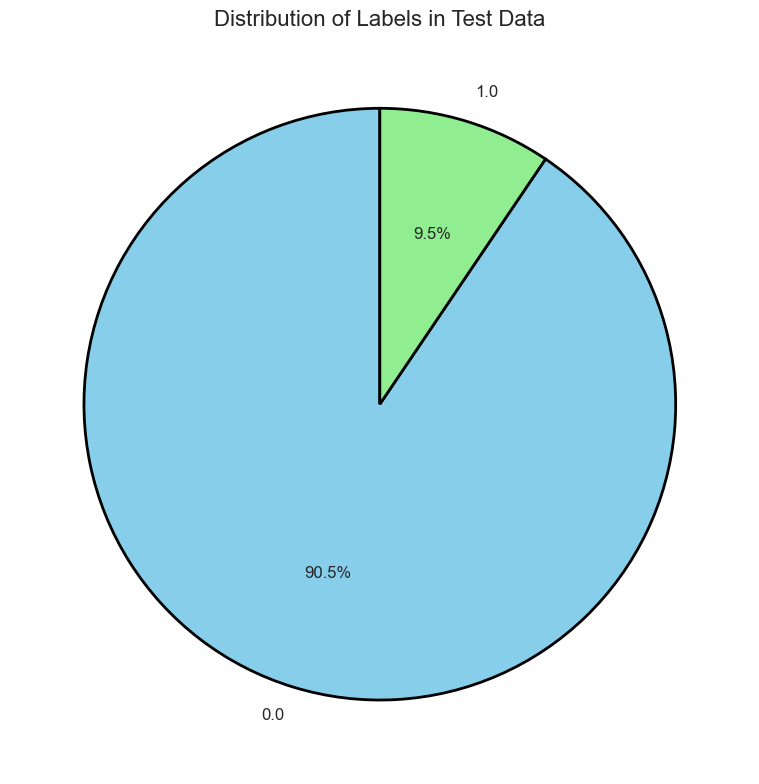

In [21]:
if 'label' in df_test.columns:
    # 统计标签的分布
    label_counts = df_test['label'].value_counts()
    labels = label_counts.index
    sizes = label_counts.values

    # 定义天蓝色和浅绿色
    colors = ['skyblue', 'lightgreen']

    # 创建饼图
    plt.figure(figsize=(8,8))
    plt.pie(sizes,
            labels=labels,
            autopct='%1.1f%%',
            startangle=90,
            colors=colors,
            wedgeprops={'edgecolor': 'black', 'linewidth': 2},
            textprops={'fontsize': 12, 'fontfamily': 'Arial'})

    plt.title('Distribution of Labels in Test Data', fontsize=16)
    plt.gca().set_aspect('equal')
    plt.tight_layout()
    plt.show()
else:
    print("Test data 不包含 label")

<span style="font-size:22px;font-weight:bold"> 4. Data Cleaning </span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This code defines several functions to prepare time-series data for machine learning, specifically targeting anomaly detection. The prepare_data_with_features function loads data from a CSV file, performs data cleaning by handling missing values and outlier clipping using winsorization, engineers new features through differencing and rolling statistics, and then scales the data using standardization. After these steps, it divides the data into overlapping sequences suitable for time-series models. The prepare_unsupervised_time_series_data function is similar but tailored for unsupervised learning. The purpose of these functions is to transform raw time-series data into a structured and preprocessed format, enhancing the signal for machine learning algorithms and improving the performance of models designed to detect anomalies.
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">**Code Snippet(data_cleaning.py):**
</span>

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize  # 导入 winsorize

def winsorize_dataframe(df: pd.DataFrame, numeric_cols: list, limits: list = [0.01, 0.01]) -> pd.DataFrame:
    df_copy = df.copy()  # 创建 DataFrame 的副本，以避免修改原始 DataFrame
    for col in numeric_cols:
        df_copy[col] = winsorize(df_copy[col], limits=limits)
    return df_copy


def prepare_unsupervised_time_series_data(
        file_path, seq_length,
        scaler=None, return_labels=False):
    try:
        df = pd.read_csv(file_path)
        print(f"成功加载：{file_path}")
    except FileNotFoundError:
        print(f"文件未找到：{file_path}")
        return None, None, None

    has_label = 'label' in df.columns
    if has_label:
        raw_labels = df['label'].values
        df = df.drop(columns=['label'])
    else:
        raw_labels = None

    # 数值列、缺失值填充、去重
    num_cols = df.select_dtypes(include=np.number).columns
    df_num  = df[num_cols].fillna(df[num_cols].mean()).drop_duplicates()

    # 标准化
    if scaler is None:
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(df_num)
        print("已 fit_transform 标准化。")
    else:
        data_scaled = scaler.transform(df_num)
        print("已 transform 标准化。")

    # 滑动窗口 + 可选标签窗口
    X, Y = [], []
    for i in range(len(data_scaled) - seq_length):
        X.append(data_scaled[i:i+seq_length])
        if return_labels and raw_labels is not None:
            # 窗口内任一点为异常则视为异常窗口
            Y.append(int(raw_labels[i:i+seq_length].any()))
    X = np.array(X)
    Y = np.array(Y) if Y else None

    print(f"生成窗口数：{X.shape[0]}, 序列长：{seq_length}, 特征数：{X.shape[2]}")
    return X, scaler, Y

def add_features(df: pd.DataFrame, seq_length: int, numeric_cols: list) -> pd.DataFrame:
    for col in numeric_cols:
        df[f'{col}_diff1'] = df[col].diff().fillna(0)
        df[f'{col}_diff2'] = df[f'{col}_diff1'].diff().fillna(0)

    # 滑动统计特征
    for col in numeric_cols:
        df[f'{col}_roll_mean'] = (
            df[col]
              .rolling(seq_length)
              .mean()
              .fillna(method='bfill')
        )
        df[f'{col}_roll_std'] = (
            df[col]
              .rolling(seq_length)
              .std()
              .fillna(method='bfill')
        )

    # 频域主频特征（只示例第一个 numeric_cols）
    def dominant_freq(x: np.ndarray) -> float:
        fft_vals = np.fft.rfft(x)
        mags     = np.abs(fft_vals)
        freqs    = np.fft.rfftfreq(len(x))
        return float(freqs[np.argmax(mags)])

    df[f'{numeric_cols[0]}_dom_freq'] = (
        df[numeric_cols[0]]
          .rolling(seq_length)
          .apply(dominant_freq, raw=True)
          .fillna(method='bfill')
    )

    return df


def prepare_data_with_features(
        file_path: str,
        seq_length: int,
        scaler: StandardScaler = None,
        return_labels: bool = False,
        winsorize_clip: bool = False  # 添加 winsorize_clip 参数
    ):
    # 1. 读取 CSV
    df = pd.read_csv(file_path)
    raw_labels = None
    if 'label' in df.columns:
        raw_labels = df['label'].values
        df = df.drop(columns=['label'])

    # 2. 保留数值列，填充缺失
    df = df.select_dtypes(include=np.number)
    df = df.fillna(method='ffill').fillna(method='bfill')

    # 3. 特征工程
    numeric_cols = df.columns.tolist()
    df = add_features(df, seq_length, numeric_cols)

    # 4. Winsorize 处理 (在标准化之前)
    if winsorize_clip:
        df = winsorize_dataframe(df, numeric_cols)  # 调用新的 winsorize_dataframe 函数

    # 5. 标准化
    if scaler is None:
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(df)
    else:
        data_scaled = scaler.transform(df)

    # 6. 滑动窗口切分
    X, Y = [], []
    n = data_scaled.shape[0]
    for i in range(n - seq_length):
        X.append(data_scaled[i:i+seq_length])
        if return_labels and raw_labels is not None:
            Y.append(int(raw_labels[i:i+seq_length].any()))
    X = np.array(X)
    Y = np.array(Y) if return_labels and raw_labels is not None else None

    return X, scaler, Y


<span style="font-size:18px;font-weight:bold"> 4.1 Code Analysis  </span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>4.1.1 Missing value imputation </strong><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By chaining the calls of `ffill` and `bfill`, all the missing values in the DataFrame can be filled as much as possible. First, use `ffill` to fill most of the missing values, and then use `bfill` to fill those missing values that cannot be filled by `ffill` because the first value is missing.
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>4.1.2 Feature Engineering </strong><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This code performs feature engineering on a DataFrame using the add_features function. It calculates the first and second-order differences for each numeric column to capture rate of change, computes rolling mean and standard deviation over a sliding window to extract local statistical features, and calculates the dominant frequency of the first numeric column to capture frequency-domain information. These new features aim to help machine learning models better understand trends, periodic behavior, and other patterns in the time-series data, thereby improving model performance in tasks such as anomaly detection.
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>4.1.3 Winsorize Processing </strong><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This code implements Winsorization to handle outliers in the DataFrame. It iterates through the specified numeric columns and applies the winsorize function, which caps extreme values by replacing those below a specified lower percentile and those above a specified upper percentile with the values at those percentiles, respectively. This process aims to reduce the impact of outliers on subsequent data analysis and modeling steps. The Winsorization is performed before standardization to preserve the original data distribution and prevent data leakage.
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>4.1.4 Standardization </strong><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This code implements standardization using the StandardScaler from scikit-learn.   If a scaler object doesn't already exist, it instantiates a new StandardScaler and uses the fit_transform method to both learn the mean and standard deviation from the data and then transform it.   If a scaler object already exists, it uses the transform method to scale the input data using the pre-computed statistics.   This ensures data is scaled to have zero mean and unit variance, which can improve the performance and convergence of many machine learning algorithms, while also preventing data leakage by using the same scaling parameters on both training and test sets.
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>4.1.5 Standardization </strong><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This code implements standardization using the StandardScaler from scikit-learn.   If a scaler object doesn't already exist, it instantiates a new StandardScaler and uses the fit_transform method to both learn the mean and standard deviation from the data and then transform it.   If a scaler object already exists, it uses the transform method to scale the input data using the pre-computed statistics.   This ensures data is scaled to have zero mean and unit variance, which can improve the performance and convergence of many machine learning algorithms, while also preventing data leakage by using the same scaling parameters on both training and test sets.
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <strong>4.1.6 Sliding Window Segmentation </strong><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This code segment creates sequences from the scaled data using a sliding window approach and splits the data into features (X) and labels (Y).  It iterates through the data, creating sequences of length seq_length, and appends them to the X list.   If return_labels is True and raw labels are provided, it creates corresponding labels Y, where each label indicates whether any data point within the sequence is an anomaly.
</span>

<span style="font-size:18px;font-weight:bold"> 4.2 Parameter Settings  </span>

In [23]:
seq_length       = 20
hidden_size      = 64
num_layers       = 2
dropout          = 0.2
lr               = 1e-3
batch_size       = 64
num_epochs       = 50
alpha            = 1.0  # 加权放大系数
winsorize_clip = True
scaler = joblib.load(scaler_path)
X_train, scaler, Y= prepare_data_with_features(
            train_file, seq_length, scaler=scaler, return_labels=True, winsorize_clip=winsorize_clip  #  使用 winsorize_clip=True
        )

In [24]:
print(f"Shape of X: {X_train.shape}")

Shape of X: (28459, 20, 196)


In [25]:
print("\nFirst 5 samples of X_train:")
print(X_train[:5])  # 打印前 5 个样本


First 5 samples of X_train:
[[[-1.69844881 -0.62312328 -0.42352137 ...  0.          0.
    0.        ]
  [-1.69844881 -0.40574673 -0.19097723 ...  0.          0.
    0.        ]
  [-1.69844881 -0.40574673 -0.52686619 ...  0.          0.
    0.        ]
  ...
  [-1.69844881 -0.40574673 -0.96612437 ...  0.          0.
    0.        ]
  [-1.69844881 -0.62312328 -1.04363909 ...  0.          0.
    0.        ]
  [-1.69844881 -0.62312328 -0.65606552 ...  0.          0.
    0.        ]]

 [[-1.69844881 -0.40574673 -0.19097723 ...  0.          0.
    0.        ]
  [-1.69844881 -0.40574673 -0.52686619 ...  0.          0.
    0.        ]
  [-1.69844881 -0.62312328 -0.68189562 ...  0.          0.
    0.        ]
  ...
  [-1.69844881 -0.62312328 -1.04363909 ...  0.          0.
    0.        ]
  [-1.69844881 -0.62312328 -0.65606552 ...  0.          0.
    0.        ]
  [-1.69844881 -0.84049983 -0.0359478  ...  0.          0.
    0.        ]]

 [[-1.69844881 -0.40574673 -0.52686619 ...  0.         

<span style="font-size:18px;font-weight:bold"> 4.3 Sliding Window Visualization  </span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In order to visualize the selection of the sliding window, we need to modify the original code so that it can return the information of the sliding window.
</span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">**Code Snippet(After modification):**
</span>

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize  # 导入 winsorize

def winsorize_dataframe(df: pd.DataFrame, numeric_cols: list, limits: list = [0.01, 0.01]) -> pd.DataFrame:
    df_copy = df.copy()  # 创建 DataFrame 的副本，以避免修改原始 DataFrame
    for col in numeric_cols:
        df_copy[col] = winsorize(df_copy[col], limits=limits)
    return df_copy


def prepare_unsupervised_time_series_data(
        file_path, seq_length,
        scaler=None, return_labels=False):
    try:
        df = pd.read_csv(file_path)
        print(f"成功加载：{file_path}")
    except FileNotFoundError:
        print(f"文件未找到：{file_path}")
        return None, None, None

    has_label = 'label' in df.columns
    if has_label:
        raw_labels = df['label'].values
        df = df.drop(columns=['label'])
    else:
        raw_labels = None

    # 数值列、缺失值填充、去重
    num_cols = df.select_dtypes(include=np.number).columns
    df_num  = df[num_cols].fillna(df[num_cols].mean()).drop_duplicates()

    # 标准化
    if scaler is None:
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(df_num)
        print("已 fit_transform 标准化。")
    else:
        data_scaled = scaler.transform(df_num)
        print("已 transform 标准化。")

    # 滑动窗口 + 可选标签窗口
    X, Y = [], []
    for i in range(len(data_scaled) - seq_length):
        X.append(data_scaled[i:i+seq_length])
        if return_labels and raw_labels is not None:
            # 窗口内任一点为异常则视为异常窗口
            Y.append(int(raw_labels[i:i+seq_length].any()))
    X = np.array(X)
    Y = np.array(Y) if Y else None

    print(f"生成窗口数：{X.shape[0]}, 序列长：{seq_length}, 特征数：{X.shape[2]}")
    return X, scaler, Y

def add_features(df: pd.DataFrame, seq_length: int, numeric_cols: list) -> pd.DataFrame:
    for col in numeric_cols:
        df[f'{col}_diff1'] = df[col].diff().fillna(0)
        df[f'{col}_diff2'] = df[f'{col}_diff1'].diff().fillna(0)

    # 滑动统计特征
    for col in numeric_cols:
        df[f'{col}_roll_mean'] = (
            df[col]
              .rolling(seq_length)
              .mean()
              .fillna(method='bfill')
        )
        df[f'{col}_roll_std'] = (
            df[col]
              .rolling(seq_length)
              .std()
              .fillna(method='bfill')
        )

    # 频域主频特征（只示例第一个 numeric_cols）
    def dominant_freq(x: np.ndarray) -> float:
        fft_vals = np.fft.rfft(x)
        mags     = np.abs(fft_vals)
        freqs    = np.fft.rfftfreq(len(x))
        return float(freqs[np.argmax(mags)])

    df[f'{numeric_cols[0]}_dom_freq'] = (
        df[numeric_cols[0]]
          .rolling(seq_length)
          .apply(dominant_freq, raw=True)
          .fillna(method='bfill')
    )

    return df


def prepare_data_with_features(
        file_path: str,
        seq_length: int,
        scaler: StandardScaler = None,
        return_labels: bool = False,
        winsorize_clip: bool = False  # 添加 winsorize_clip 参数
    ):
    # 1. 读取 CSV
    df = pd.read_csv(file_path)
    raw_labels = None
    if 'label' in df.columns:
        raw_labels = df['label'].values
        df = df.drop(columns=['label'])

    # 2. 保留数值列，填充缺失
    df = df.select_dtypes(include=np.number)
    df = df.fillna(method='ffill').fillna(method='bfill')

    # 3. 特征工程
    numeric_cols = df.columns.tolist()
    df = add_features(df, seq_length, numeric_cols)

    # 4. Winsorize 处理 (在标准化之前)
    if winsorize_clip:
        df = winsorize_dataframe(df, numeric_cols)  # 调用新的 winsorize_dataframe 函数

    # 5. 标准化
    if scaler is None:
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(df)
    else:
        data_scaled = scaler.transform(df)

    # 6. 滑动窗口切分
    X, Y = [], []
    window_indices = []  # 存储窗口的起始和结束索引
    n = data_scaled.shape[0]
    for i in range(n - seq_length):
        X.append(data_scaled[i:i+seq_length])
        window_indices.append((i, i + seq_length)) # 保存窗口的起始和结束索引
        if return_labels and raw_labels is not None:
            Y.append(int(raw_labels[i:i+seq_length].any()))
    X = np.array(X)
    Y = np.array(Y) if return_labels and raw_labels is not None else None

    return X, scaler, Y, df, window_indices # 返回 DataFrame 和 窗口索引



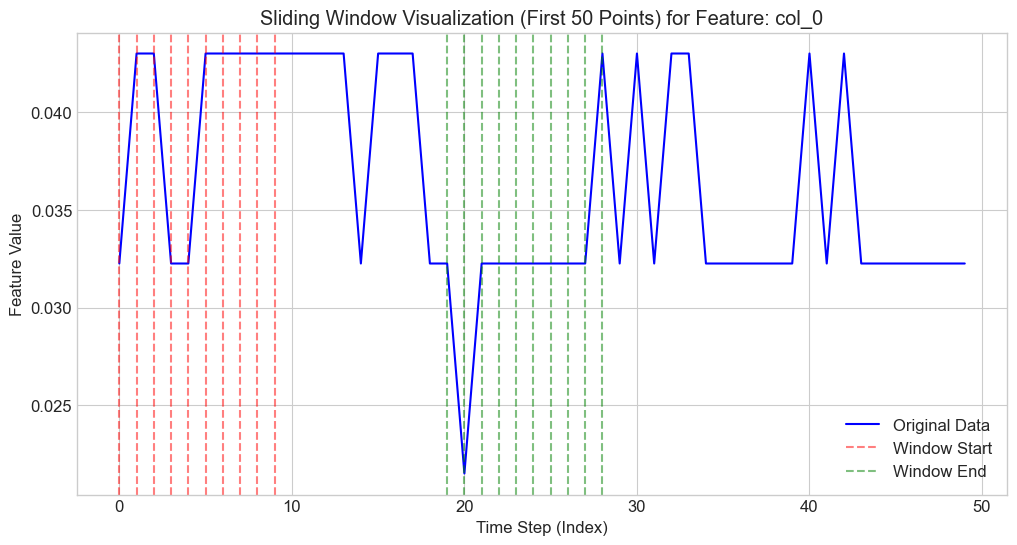

In [27]:
# 调用修改后的函数
X_train, scaler, Y, df, window_indices = prepare_data_with_features(
    train_file, seq_length, scaler=scaler, return_labels=True, winsorize_clip=winsorize_clip
)

# 选择要可视化的特征
feature_to_visualize = 'col_0'  # 选择要可视化的特征列名 (例如 'col_0',  'col_1' 等)

# 限制数据点数量
max_points = 50
df_subset = df[:max_points].copy()  # 创建一个包含前 5000 个点的 DataFrame 副本
window_indices_subset = [(start, end) for start, end in window_indices if start < max_points] # 过滤窗口索引

# 创建滑动窗口可视化
fig, ax = plt.subplots(figsize=(12, 6))

# 绘制原始数据
ax.plot(df_subset[feature_to_visualize], label='Original Data', color='blue')

# 绘制滑动窗口边界
num_windows_to_visualize = min(10, len(window_indices_subset))  # 最多可视化 5 个窗口
for i in range(num_windows_to_visualize):
    start, end = window_indices_subset[i]
    ax.axvline(x=start, color='red', linestyle='--', alpha=0.5, label=f'Window Start' if i == 0 else None)  # 绘制起始边界
    ax.axvline(x=end-1, color='green', linestyle='--', alpha=0.5, label=f'Window End' if i == 0 else None)  # 绘制结束边界

ax.set_xlabel('Time Step (Index)') # 修改了横坐标轴的标签
ax.set_ylabel('Feature Value')
ax.set_title(f'Sliding Window Visualization (First {max_points} Points) for Feature: {feature_to_visualize}') # 修改了标题

# 处理图例，避免重复标签
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.show()

<span style="font-size:22px;font-weight:bold"> 5. Conclusion </span>

<span style="font-size:18px;font-family: 'Times New Roman', Times, serif;">
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Through meticulous analysis of the dataset, we've undertaken a series of critical preprocessing steps to prepare it for model development.  These included data transformation to ensure compatibility, data cleansing to handle missing values and outliers, feature engineering to extract informative signals from the raw data, and data standardization to eliminate scaling biases.  These processes collectively lay a robust foundation for building accurate and reliable models.
</span>